In [44]:
%load_ext autoreload
%autoreload 2

import sys
import torch
sys.path.insert(1, '../../')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [45]:
from src.utils.data_utils import EcgDataModule
ecg_data_module = EcgDataModule()
ecg_data_module.prepare_data()

In [46]:
ecg_data_module.setup(stage='fit')

train dataset loaded!
val dataset loaded!


In [47]:
train_ds, val_ds = ecg_data_module.train_ds, ecg_data_module.val_ds

In [75]:
from src.basic.ecg import Ecg
ecg: Ecg = train_ds.signals[54]
ecg.is_used=True

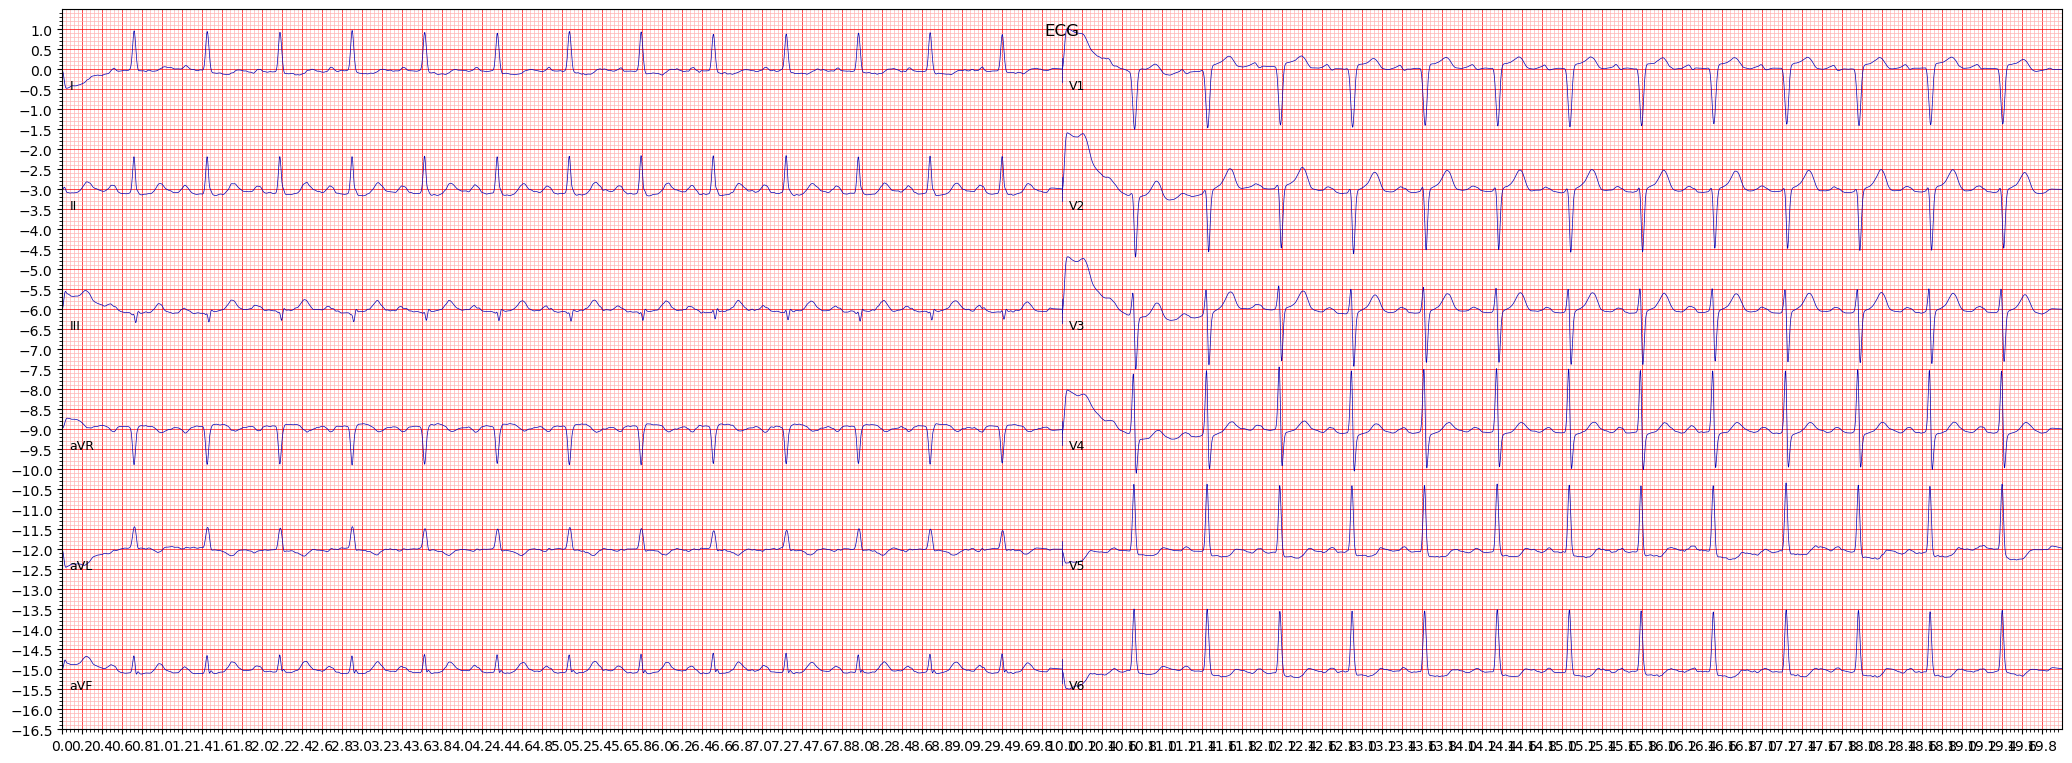

In [76]:
ecg.show_with_grid(show_cleaned=True)

In [81]:

ecg.delineate(check_T_inversion=True, check_P_inversion=True)
for i in range(12):
    lengths = [len(value) for value in ecg.delineations[i].values()]
    print(lengths)

Delineating ECG signal...
Delineating inverted ECG signal...
Cleaning ECG signal...
Finding R-peaks...
Delineating ECG signal...
--> Cannot delineate the ECG signal
--> Cannot delineate the inverted ECG signal
[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13]
[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13]
[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13]
[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]
[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13]
[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13]
[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13]
[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13]
[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13]
[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13]
[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13]


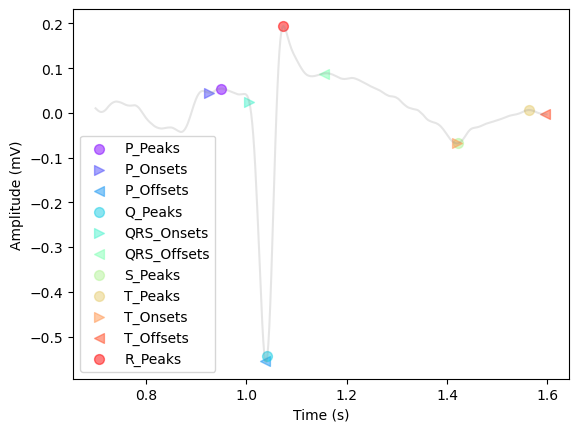

In [71]:
ecg.plot_delineation(lead='aVR')

In [68]:
for key, value in delin.items():
    if len(value) == 9:
        print(key, value)

ECG_Q_Peaks [ 467 1014 1548 2112 2654 3207 3760 4303 4853]


In [69]:
from src.utils.ecg_utils import get_delineation
delin = get_delineation(ecg.cleaned[9], ecg.all_rpeaks[9])
lengths = [len(value) for value in delin.values()]
print(lengths)
print(delin)

[10, 10, 10, 9, 10, 10, 10, 10, 10, 10, 10]
{'ECG_P_Peaks': array([  nan,  412.,  962., 1507., 2060., 2608., 3160., 3707., 4257.,
       4801.]), 'ECG_P_Onsets': array([  nan,  387.,  927., 1476., 2039., 2587., 3136., 3685., 4229.,
       4776.]), 'ECG_P_Offsets': array([  nan,  448.,  995., 1545., 2109., 2649., 3192., 3738., 4298.,
       4832.]), 'ECG_Q_Peaks': array([ 467, 1014, 1548, 2112, 2654, 3207, 3760, 4303, 4853]), 'ECG_R_Onsets': array([  nan,  414., 1028., 1568., 2132., 2616., 3230., 3777., 4328.,
       4867.]), 'ECG_R_Offsets': array([ 216.,  549., 1100., 1647., 2197., 2745., 3294., 3840., 4392.,
         nan]), 'ECG_S_Peaks': array([ 385,  535, 1085, 1632, 2183, 2730, 3279, 3825, 4377, 4924]), 'ECG_T_Peaks': array([ 408.,  714., 1267., 1813., 2367., 2913., 3462., 4008., 4557.,
         nan]), 'ECG_T_Onsets': array([ 388.,  682., 1239., 1787., 2339., 2883., 3437., 3981., 4533.,
         nan]), 'ECG_T_Offsets': array([ 448.,  746., 1305., 1919., 2393., 2946., 3501., 4035.,

In [18]:
inverted_ecg: Ecg = ecg.invert()
inverted_ecg_delineations, _, _ = inverted_ecg.delineate(check_T_inversion=False,
                                                        check_P_inversion=False)
lengths = [len(value) for value in inverted_ecg_delineations[3].values()]
print(lengths)

Cleaning ECG signal...
Finding R-peaks...
Delineating ECG signal...
[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13]


In [ ]:
from src.utils.ecg_utils import get_all_delineations
get_all_delineations(ecg.cleaned, ecg.all_rpeaks)

In [24]:
ecg.delineate(check_T_inversion=False, check_P_inversion=False)

Delineating ECG signal...


([{'ECG_P_Peaks': array([ 216,  603,  998, 1390, 1781, 2174, 2571, 2964, 3352, 3725, 4135,
          4521, 4846]),
   'ECG_P_Onsets': array([ 204,  579,  970, 1372, 1763, 2163, 2558, 2946, 3339, 3709, 4098,
          4486, 4824]),
   'ECG_P_Offsets': array([ 238,  630, 1017, 1407, 1800, 2188, 2587, 2986, 3371, 3733, 4151,
          4538, 4854]),
   'ECG_Q_Peaks': array([ 268,  660, 1047, 1438, 1827, 2219, 2615, 2999, 3375, 3787, 4153,
          4567, 4884]),
   'ECG_R_Onsets': array([ 259,  652, 1029, 1425, 1816, 2201, 2607, 3008, 3392, 3776, 4164,
          4544, 4875]),
   'ECG_R_Offsets': array([ 320.,  701., 1094., 1504., 1888., 2306., 2679., 3057., 3442.,
          3843., 4236., 4610.,   nan]),
   'ECG_S_Peaks': array([ 302,  694, 1081, 1472, 1865, 2257, 2652, 3046, 3434, 3825, 4214,
          4603, 4926]),
   'ECG_T_Peaks': array([ 419.,  804., 1098., 1586., 1982., 2373., 2683., 3166., 3473.,
          3938., 4329., 4713.,   nan]),
   'ECG_T_Onsets': array([ 369.,  750., 1083., 1

In [29]:
print(len(ecg.delineations[3]['ECG_Q_Peaks']))
print(len(inverted_ecg_delineations[3]['ECG_R_Peaks']))

12
13


In [39]:
ecg.delineate(check_T_inversion=False, check_P_inversion=False)
for i in range(12):
    lengths = [len(value) for value in ecg.delineations[i].values()]
    print(lengths)

Delineating ECG signal...
[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13]
[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13]
[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13]
[12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]
[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13]
[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13]
[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13]
[12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]
[12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]
[12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]
[12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]
[12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]


In [40]:
for i in range(12):
    lengths = [len(value) for value in inverted_ecg.delineations[i].values()]
    print(lengths)

[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13]
[12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]
[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13]
[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13]
[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13]
[12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]
[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13]
[12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]
[12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]
[12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]
[12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]
[12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]


In [41]:
ecg.delineate(check_T_inversion=True, check_P_inversion=True)
for i in range(12):
    lengths = [len(value) for value in ecg.delineations[i].values()]
    print(lengths)

Delineating ECG signal...
Cleaning ECG signal...
Finding R-peaks...
Delineating ECG signal...
original delineation 13
inverted delineation 13
2
[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13]
[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13]
[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13]
[12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 12]
[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13]
[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13]
[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13]
[12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]
[12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]
[12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]
[12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]
[12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]


In [43]:
ecg.delineate(check_T_inversion=True, check_P_inversion=True)
for i in range(12):
    lengths = [len(value) for value in ecg.delineations[i].values()]
    print(lengths)

Delineating ECG signal...
Cleaning ECG signal...
Finding R-peaks...
Delineating ECG signal...
[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13]
[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13]
[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13]
[12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]
[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13]
[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13]
[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13]
[12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]
[12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]
[12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]
[12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]
[12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]


In [34]:
ecg.delineate(check_T_inversion=True, check_P_inversion=True)
print(ecg.delineations[3]['ECG_R_Peaks'])
print(inverted_ecg_delineations[3]['ECG_R_Peaks'])

Delineating ECG signal...
Cleaning ECG signal...
Finding R-peaks...
Delineating ECG signal...
original delineation 13
inverted delineation 13
2
[ 269  662 1050 1440 1830 2224 2620 3013 3401 3793 4182 4570]
[ 286  679 1067 1457 1848 2242 2637 3030 3418 3810 4199 4587 4905]


In [13]:
for i in range(12):
    lengths = [len(value) for value in ecg.delineations[i].values()]
    print(lengths)

[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13]
[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13]
[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13]
[12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 12]
[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13]
[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13]
[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13]
[12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]
[12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]
[12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]
[12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]
[12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]
